# **Credit Card Fraud Detection**

The dataset consists of credit cards transactions in September 2013 by European cardholders. It presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.
It consists of 28 Principle Components Analysis transformed features from V1 to V28.
Due to confidentiality issue, no additional data of original features is provided; hence pre-analysis of features cannot be done.

In this kernel I have attempted to get the model which gives best performance while handling imbalanced data.
Modeling algorithms for balancing data used in the kernel (click on below links to go to respective sections)-
 - Modeling using Imbalanced data
 - SMOTE
 - ADASYN

<font color=blue size = 4.8>Import necessary libraries</font>

In [1]:
#Importing Data manipulation and plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import warnings

In [2]:
#Importing libraries for performance measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve

In [3]:
#Importing libraries For data splitting
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Import libraries for data balancing
from imblearn.over_sampling import SMOTE, ADASYN

<font color=blue size = 4.8>Loading Dataset</font>

In [5]:
warnings.filterwarnings("ignore")
os.chdir("../data_files/")
data = pd.read_csv("creditcard.csv")

In [6]:
pd.options.display.max_columns = 200

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(284807, 31)

<Axes: xlabel='Class', ylabel='count'>

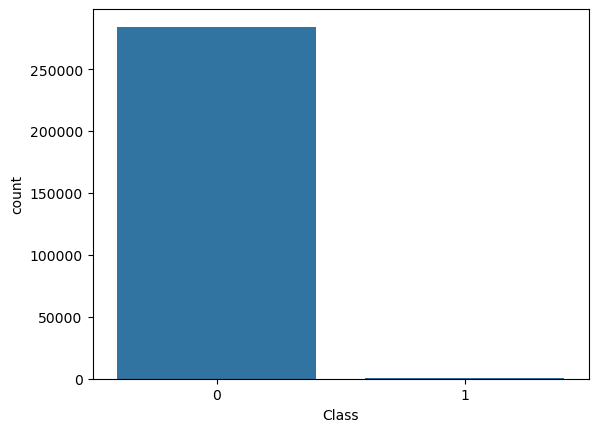

In [9]:
sns.countplot(x='Class', data=data)

<font color=green>As we can see the data is highly imbalanced. Out of 2 lakh cases only 492 are fraud cases.</font>

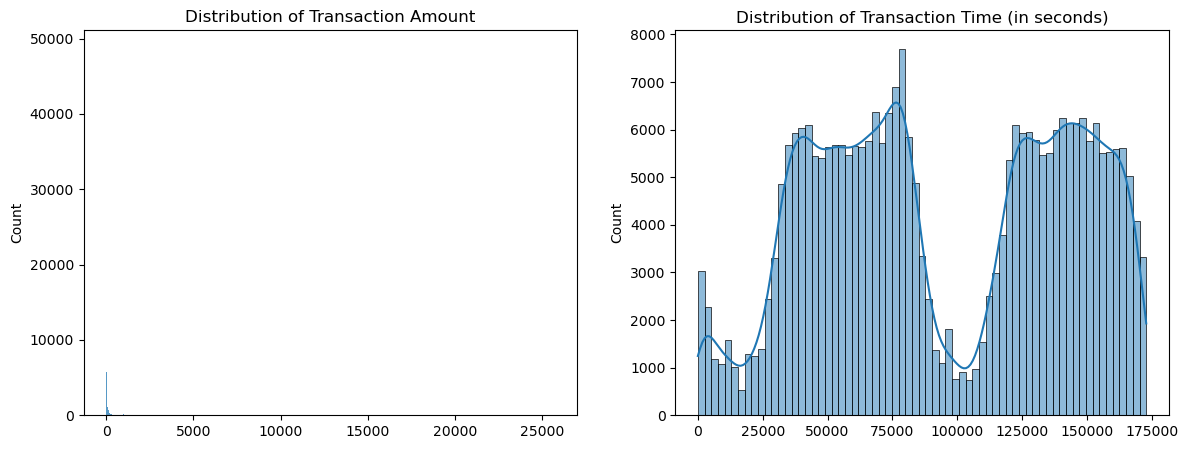

In [10]:
f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Amount'].values,ax=axes[0])
axes[0].set_title("Distribution of Transaction Amount")
sns.histplot(data['Time'].values,ax=axes[1],kde=True)
axes[1].set_title("Distribution of Transaction Time (in seconds)")
plt.show()

In [11]:
data.drop(['Time'], inplace = True, axis =1)

In [12]:

data['Class'].value_counts()[1]/data.shape[0]

np.float64(0.001727485630620034)

In [13]:
y = data.iloc[:,29]
X = data.iloc[:,0:29]
X.shape

(284807, 29)

In [14]:
y.shape

(284807,)

In [15]:
X_train, X_test, y_train, y_test =   train_test_split(X,
                                                      y,
                                                      test_size = 0.3,
                                                      stratify = y
                                                      )

In [16]:
X_train.shape

(199364, 29)

In [17]:
y_train.shape

(199364,)

<font color=blue size = 4.8>Modeling on imbalanced data</font>

Significance of confusion matrixx that can be seen for this dataset -
 - True Positive: Number of fraud cases the model predicted as 'fraud'.
 - False Positive: Number of non-fraud cases that the model predicted as 'fraud'.
 - True Negative: Number of non-fraud cases that the model predicted as 'non-fraud'.
 - False Negative: Number of fraud cases that the model predicted as 'non-fraud'.
 - Precision: Precision is the ratio of correctly predicted fraud cases to total predicted fraud cases.

Hence we can focus on the model that gives least False Negative values.

'scale_pos_weight' is used for imbalanced dataset wherein it balancese the Negative and Positive weights. With the default value of '1', it implies that the positive class has a weight equal to the negative class. 
'max_delta_step' specifies maximum delta step to be allowed for each leaf output. It helps in logistic regression when data is highly imbalanced.
Here is defined a range of scale_pos_weight & max_delta_step. The best combination of these parameters which will give a better accuracy, precision, recall and F score. At the same time keeping FN as minimum as possible.

<font color=brown size = 3>[A] Modeling using XGBClassifier</font>

In [18]:
max_delta_step= [1,2,3,4,5,6,7,8,9,10]
scale_pos_weight= [1,2,3,4,5,6,7,8,9,10]
num_zeros = (data['Class'] == 0).sum()
num_ones = (data['Class'] == 1).sum()
sp_weight = num_zeros / num_ones
for i in max_delta_step:
    print('--------------------')
    print('Iteration ', i)
    print('--------------------')
    print('scale_pos_weight = {} '.format(i))
    print('max_delta_step = {} '.format(i))
    xgb = XGBClassifier(scale_pos_weight = i,max_delta_step=i)
    xgb.fit(X_train,y_train)
    xgb_predict = xgb.predict(X_test)
    xgb_proba = xgb.predict_proba(X_test)
    xgb_cm = confusion_matrix(y_test, xgb_predict)
    p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,xgb_predict)
    print('Accuracy',accuracy_score(y_test, xgb_predict))
    print('Confusion Matrix: \n', xgb_cm)
    print('Precision: ',p_xg)
    print('Recall: ',r_xg)
    print('F score: ',f_xg)

--------------------
Iteration  1
--------------------
scale_pos_weight = 1 
max_delta_step = 1 
Accuracy 0.9994850368081645
Confusion Matrix: 
 [[85287     8]
 [   36   112]]
Precision:  [0.99957807 0.93333333]
Recall:  [0.99990621 0.75675676]
F score:  [0.99974211 0.8358209 ]
--------------------
Iteration  2
--------------------
scale_pos_weight = 2 
max_delta_step = 2 
Accuracy 0.9994733330992591
Confusion Matrix: 
 [[85286     9]
 [   36   112]]
Precision:  [0.99957807 0.92561983]
Recall:  [0.99989448 0.75675676]
F score:  [0.99973625 0.83271375]
--------------------
Iteration  3
--------------------
scale_pos_weight = 3 
max_delta_step = 3 
Accuracy 0.9994733330992591
Confusion Matrix: 
 [[85284    11]
 [   34   114]]
Precision:  [0.99960149 0.912     ]
Recall:  [0.99987104 0.77027027]
F score:  [0.99973625 0.83516484]
--------------------
Iteration  4
--------------------
scale_pos_weight = 4 
max_delta_step = 4 
Accuracy 0.9994733330992591
Confusion Matrix: 
 [[85283    12]
 [ 

<font color=green>We can observe that the combination of scale_pos_weight=10 and max_delta_step=10 gives us the best values for Precision, Recall and Fscore. Also the False negatives is also minimum : 29 </font>

<font color=brown size =3>[B] Modeling using balanced weights in Random Forest</font>

In [19]:
rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1, class_weight="balanced")

In [20]:
rf1 = rf.fit(X_train,y_train)
y_pred_rf = rf1.predict(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)

In [21]:
accuracy_score(y_test,y_pred_rf)

0.9994265182636377

In [22]:
confusion_matrix(y_test,y_pred_rf)

array([[85289,     6],
       [   43,   105]])

In [23]:
p_rf,r_rf,f_rf,_  = precision_recall_fscore_support(y_test,y_pred_rf)

In [24]:
print('Precision:',p_rf , '\nRecall',r_rf,'\nFscore',f_rf,_ )

Precision: [0.99949609 0.94594595] 
Recall [0.99992966 0.70945946] 
Fscore [0.99971282 0.81081081] [85295   148]


<font color=blue size = 4.8>Synthetic Minority Over sampling Technique (SMOTE)</font>

In [25]:
sm = SMOTE(random_state=42)

In [26]:
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [27]:
X_smote.shape

(398040, 29)

In [28]:
y_smote.shape

(398040,)

In [29]:
np.sum(y_smote)/len(y_smote)

#We can see now the data is balanced

np.float64(0.5)

In [30]:
y_smote = y_smote.values.reshape(y_smote.size, 1)
y_smote.shape 

(398040, 1)

In [31]:
xg_smote = XGBClassifier(learning_rate=0.1,
                   reg_alpha= 0,
                   reg_lambda= 1,
                   )
rf_smote = RandomForestClassifier(n_estimators=100,n_jobs=-1)

columns = X_train.columns
X_smote = pd.DataFrame(data = X_smote, columns = columns)

xg_fit = xg_smote.fit(X_smote,y_smote)
rf_fit = rf_smote.fit(X_smote,y_smote)

y_pred_xgb = xg_fit.predict(X_test)
y_pred_rfb = rf_fit.predict(X_test)

y_pred_xgb_prob = xg_fit.predict_proba(X_test)
y_pred_rfb_prob = rf_fit.predict_proba(X_test)

p_rfb,r_rfb,f_rfb,_  = precision_recall_fscore_support(y_test,y_pred_rfb)
p_xgb,r_xgb,f_xgb,_  = precision_recall_fscore_support(y_test,y_pred_xgb)


print('Random Forest:\n')
print('Accuracy - ',accuracy_score(y_test,y_pred_rfb))
print('\nPrecision - ',p_rfb , '\nRecall - ',r_rfb,'\nFscore - ',f_rfb,_ )
print('Confusion Matrix -\n',confusion_matrix(y_test,y_pred_rfb))

print('\n')
print('XGBoost:\n')
print('Accuracy - ',accuracy_score(y_test,y_pred_xgb))
print('\nPrecision - ',p_xgb , '\nRecall - ',r_xgb,'\nFscore - ',f_xgb,_ )
print('Confusion Matrix - \n',confusion_matrix(y_test,y_pred_xgb))



Random Forest:

Accuracy -  0.9994382219725431

Precision -  [0.99963662 0.87313433] 
Recall -  [0.99980069 0.79054054] 
Fscore -  [0.99971865 0.82978723] [85295   148]
Confusion Matrix -
 [[85278    17]
 [   31   117]]


XGBoost:

Accuracy -  0.9983731844621561

Precision -  [0.99973005 0.5186722 ] 
Recall -  [0.99864001 0.84459459] 
Fscore -  [0.99918474 0.64267352] [85295   148]
Confusion Matrix - 
 [[85179   116]
 [   23   125]]


<font color=green>It is observed that Random Forest gives better results as compared to XGBoost</font>

<font color=blue size = 4.8>ADAptive SYNthetic (ADASYN)</font>

In [32]:
adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

In [33]:
X_ada.shape

(398046, 29)

In [34]:
y_ada.shape

(398046,)

In [35]:
np.sum(y_ada)/len(y_ada)

y_ada = y_ada.values.reshape(y_ada.size, 1)
y_ada.shape 

xg_ada = XGBClassifier(learning_rate=0.5,
                   reg_alpha= 0.1,
                   reg_lambda= 1,
                   )


rf_ada = RandomForestClassifier(n_estimators=100,n_jobs=-1)

columns = X_train.columns
X_ada = pd.DataFrame(data = X_ada, columns = columns)

xg_fit = xg_ada.fit(X_ada,y_ada)


rf_fit = rf_ada.fit(X_ada,y_ada)

y_pred_xgb = xg_fit.predict(X_test)


y_pred_rfb = rf_fit.predict(X_test)

y_pred_xgb_prob = xg_fit.predict_proba(X_test)
y_pred_rfb_prob = rf_fit.predict_proba(X_test)

p_rfb,r_rfb,f_rfb,_  = precision_recall_fscore_support(y_test,y_pred_rfb)

p_xgb,r_xgb,f_xgb,_  = precision_recall_fscore_support(y_test,y_pred_xgb)


print('Random Forest:\n')
print('Accuracy - ',accuracy_score(y_test,y_pred_rfb))
print('Precision - \n',p_rfb , 'Recall - \n',r_rfb,'Fscore - \n',f_rfb,_ )
print('Confusion Matrix - \n',confusion_matrix(y_test,y_pred_rfb))

print('\n')
print('XGBoost:\n')
print('Accuracy XGBoost',accuracy_score(y_test,y_pred_xgb))
print('Precision XGBoost:',p_xgb , 'Recall',r_xgb,'Fscore',f_xgb,_ )
print('Confusion Matrix - \n',confusion_matrix(y_test,y_pred_xgb))


Random Forest:

Accuracy -  0.9994499256814484
Precision - 
 [0.99964833 0.87407407] Recall - 
 [0.99980069 0.7972973 ] Fscore - 
 [0.99972451 0.83392226] [85295   148]
Confusion Matrix - 
 [[85278    17]
 [   30   118]]


XGBoost:

Accuracy XGBoost 0.9993445923013002
Precision XGBoost: [0.99969516 0.80263158] Recall [0.99964828 0.82432432] Fscore [0.99967172 0.81333333] [85295   148]
Confusion Matrix - 
 [[85265    30]
 [   26   122]]


<font color=green>For Adasyn as well it is observed that Random Forest gives better results as compared to XGBoost</font>